<a href="https://colab.research.google.com/github/dynasty-29/Fifa-Ranking/blob/main/Moringa_Data_Science_Core_ModuleII_W6_Independent_Project_2022_06_Margaret_Gathoni.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

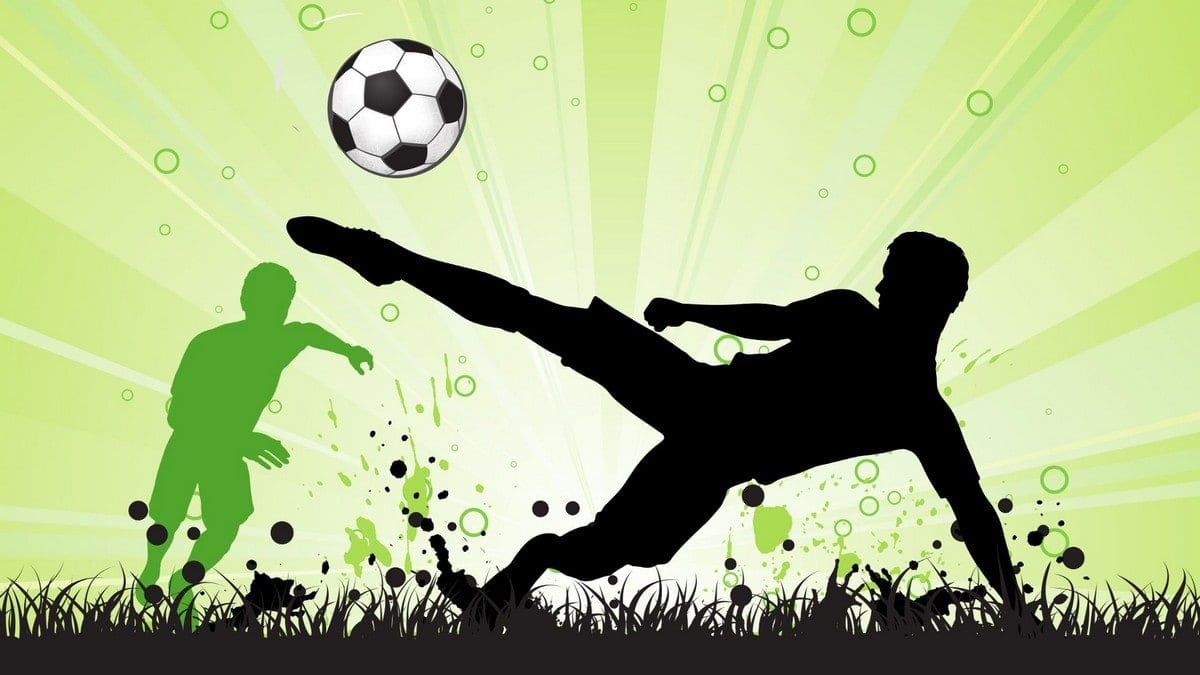

# **Introduction**

Mchezo Pesa is a football company  whose objective is to promote the development of corporate football leagues globally.



# **BUSINESS Understanding**
### **a) Problem Statement**

The company want to understand the current state of the team in terms of home team’s perspective if the game is a Win, Lose or Draw. Been contracted as an Analysts to get an overview of the team games and also to create a model able to predict result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).


### **b) Defining the Metric for Success**


*  Find and deal with outliers, anomalies, and missing data within the dataset.


*   Comprehensive EDA 
*   Accurately predict the winning team based on the two factors:based on who's home and who's away and on whether or not the game is friendly (include rank in your training).



 *   The model achieves atleast 80% accuracy


*   Using metrics of logistic to measure performance of the model and choose the best
 





### **c) Understanding the context**

The Coca-Cola ranking system was designed by FIFA and named 'SUM'. This ranking method utilises a metric that adds or subtracts points to the previous score instead of finding the average score. The lowest score which may be negative indicates the worst team while the highest score indicated the best team.





## **Data Understanding**

In [1]:
#importing important libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### **A. FIFA RAnking DATASET**

**1. Reading the Data**

In [2]:
#load Ranking data
rank = pd.read_csv('fifa_ranking.csv')

**2.0 Checking the  Data**

In [3]:
# Determining the no. of records in our dataset
rank.shape

(57793, 16)

In [4]:
# Previewing the top of our dataset
rank.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [5]:
# Previewing the bottom of our dataset
rank.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [6]:
# Checking whether each column has an appropriate datatype
rank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

Its important to note FIFA ranking is a ranking system for national (country) team. The Ranking is determined by the number of points a team have accumulated (Total Points). So for this dataset the important columns to move  foward with are Rank, Country, Total Points and rank dates. So we drop all other unnecessary columns

In [7]:
#chosing the relevant columns to work with and dropping those wenot interested in
rank = rank.drop(['country_abrv', 'cur_year_avg_weighted','previous_points',
                  'rank_change', 'cur_year_avg','last_year_avg', 
                  'two_year_ago_weighted', 'three_year_ago_weighted', 
                  'last_year_avg_weighted', 'two_year_ago_avg',
                  'three_year_ago_avg','confederation'], axis=1)
rank.head(3)

,rank,country_full,total_points,rank_date
0,1,Germany,0.0,1993-08-08
1,2,Italy,0.0,1993-08-08
2,3,Switzerland,0.0,1993-08-08


Ranking  system started in 1992 Dec so we make sure we have data withinthis time frame

In [8]:
rank['rank_date'].min()

'1993-08-08'

In [9]:
#we need to split the date column to create a year and month column
#First we need to change our format
rank['rank_date'] = pd.to_datetime(rank.rank_date, format='%Y-%m-%d')
rank['rank_date'] = rank['rank_date'].dt.strftime('%Y-%m-%d')
#then create the new columns
rank['year'] = pd.DatetimeIndex(rank['rank_date']).year
rank['month'] = pd.DatetimeIndex(rank['rank_date']).month

rank.head(2)

,rank,country_full,total_points,rank_date,year,month
0,1,Germany,0.0,1993-08-08,1993,8
1,2,Italy,0.0,1993-08-08,1993,8


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


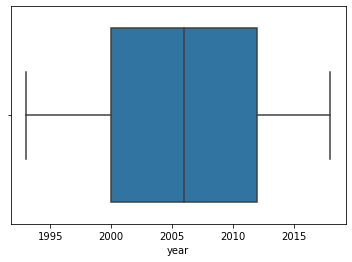

In [10]:
#checking our timeline
sns.boxplot(rank['year'])

Our Ranking runs from 1993 onward so will use this data set

In [11]:
#We don't need the rank date column so we drop it
rank = rank.drop(['rank_date'], axis=1)
rank.head(2)

,rank,country_full,total_points,year,month
0,1,Germany,0.0,1993,8
1,2,Italy,0.0,1993,8


**Tidying the Dataset**

In [12]:
# Checking for duplicates
rank.duplicated().sum().sum()

65

In [13]:
# dropping duplicate values
rank.drop_duplicates(keep=False,inplace=True)

In [14]:
rank.duplicated().sum().sum()

0

In [15]:
rank.shape

(57663, 5)

In [16]:
# Identifying the Missing Data
rank.isnull().values.any()

False

We don't  have missing values

# **B. FIFA RESULT DATASET**

**1. Reading the data**

In [17]:
result = pd.read_csv('results.csv')

### **2. Checking the Data**

In [18]:
# Determining the no. of records in our dataset
result.shape

(40839, 9)

In [19]:
# Previewing the top of our dataset
result.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [20]:
# Previewing the bottom of our dataset
result.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [21]:
# Checking whether each column has an appropriate datatype
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   city        40839 non-null  object
 7   country     40839 non-null  object
 8   neutral     40839 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


**Tidying the dataset**

Remeber FiFA Ranking focus is National team. However for this part we also need the tournament data set forfurther analysis. so we drop unnecessary columns

In [22]:
#choosing the relevant columns in the results dataset and dropping those wedon't need
results = result.drop(['city', 'neutral'], axis=1)
results.head()

,date,home_team,away_team,home_score,away_score,tournament,country
0,1872-11-30,Scotland,England,0,0,Friendly,Scotland
1,1873-03-08,England,Scotland,4,2,Friendly,England
2,1874-03-07,Scotland,England,2,1,Friendly,Scotland
3,1875-03-06,England,Scotland,2,2,Friendly,England
4,1876-03-04,Scotland,England,3,0,Friendly,Scotland


In [23]:
#we need to split the date column and form a year  column
#First we need to change our format
results['date'] = pd.to_datetime(results.date, format='%Y-%m-%d')
results['date'] = results['date'].dt.strftime('%Y-%m-%d')
#then create the new columns
results['year'] = pd.DatetimeIndex(results['date']).year
results['month'] = pd.DatetimeIndex(results['date']).month

results.head(2)

,date,home_team,away_team,home_score,away_score,tournament,country,year,month
0,1872-11-30,Scotland,England,0,0,Friendly,Scotland,1872,11
1,1873-03-08,England,Scotland,4,2,Friendly,England,1873,3


Fifa ranking began in 1992and our FIFA ranking data start in1993 so we drop anything before that

In [24]:
results['date'].min()

'1872-11-30'

We see we have data from as early as 1872

In [25]:
#We create a new table with data dating above 1993 - 08 - 07
res = results[results['date'] > '1993-08-07']

In [26]:
res.shape

(22924, 9)

In [27]:
#Lets see our minimum data now
res['date'].min()

'1993-08-08'

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


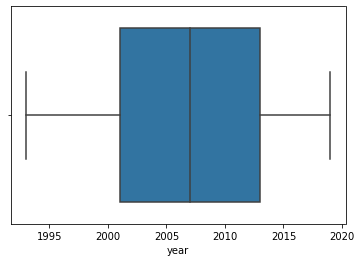

In [28]:
#Visualize our time line
sns.boxplot(res['year'])

In [29]:
#We don't need the  date column so we drop it
res = res.drop(['date'], axis=1)
res.head(2)

,home_team,away_team,home_score,away_score,tournament,country,year,month
17915,Bolivia,Uruguay,3,1,FIFA World Cup qualification,Bolivia,1993,8
17916,Brazil,Mexico,1,1,Friendly,Brazil,1993,8


In [30]:
#checking for duplicates in the results dataset
res.duplicated().sum()

49

In [31]:
# dropping duplicate values
res.drop_duplicates(keep=False,inplace=True)
 

In [32]:
res.duplicated().sum()

0

In [33]:
# Identifying the Missing Data
res.isnull().sum()

home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
country       0
year          0
month         0
dtype: int64

combining the two datasets to one for further analysis

# **COMBINING OUR TWO DATASETS**

We need to combine the two data and match rge home team from result to the country from rank; we do the same for the away team

In [34]:
#obtaining the final dataset for modelling
df = res.merge(rank, left_on=['home_team', 'year'], right_on=['country_full', 'year'], how='inner')
df = df.merge(rank, left_on=['away_team', 'year'], right_on=['country_full', 'year'], how='inner')
df.head()

,home_team,away_team,home_score,away_score,tournament,country,year,month_x,rank_x,country_full_x,total_points_x,month_y,rank_y,country_full_y,total_points_y,month
0,Bolivia,Uruguay,3,1,FIFA World Cup qualification,Bolivia,1993,8,59,Bolivia,0.0,8,22,Uruguay,0.0,8
1,Bolivia,Uruguay,3,1,FIFA World Cup qualification,Bolivia,1993,8,59,Bolivia,0.0,8,15,Uruguay,0.0,9
2,Bolivia,Uruguay,3,1,FIFA World Cup qualification,Bolivia,1993,8,59,Bolivia,0.0,8,17,Uruguay,0.0,10
3,Bolivia,Uruguay,3,1,FIFA World Cup qualification,Bolivia,1993,8,59,Bolivia,0.0,8,18,Uruguay,0.0,11
4,Bolivia,Uruguay,3,1,FIFA World Cup qualification,Bolivia,1993,8,59,Bolivia,0.0,8,17,Uruguay,0.0,12


Now after combiningthe two data set some columns work is done and will not move with them further so we drop them

In [35]:
df.drop(['country', 'month_x', 'month', 'month_y', 'country_full_x', 'country_full_y'], axis=1, inplace=True)
df.head()

,home_team,away_team,home_score,away_score,tournament,year,rank_x,total_points_x,rank_y,total_points_y
0,Bolivia,Uruguay,3,1,FIFA World Cup qualification,1993,59,0.0,22,0.0
1,Bolivia,Uruguay,3,1,FIFA World Cup qualification,1993,59,0.0,15,0.0
2,Bolivia,Uruguay,3,1,FIFA World Cup qualification,1993,59,0.0,17,0.0
3,Bolivia,Uruguay,3,1,FIFA World Cup qualification,1993,59,0.0,18,0.0
4,Bolivia,Uruguay,3,1,FIFA World Cup qualification,1993,59,0.0,17,0.0


In [36]:
#Renaming our columns 
df.rename(columns={'rank_x':'home_team_rank',
                     'rank_y':'away_team_rank',
                     'total_points_x':'home_team_points',
                     'total_points_y':'away_team_points'}, 
                 inplace=True)
 
df.head()

,home_team,away_team,home_score,away_score,tournament,year,home_team_rank,home_team_points,away_team_rank,away_team_points
0,Bolivia,Uruguay,3,1,FIFA World Cup qualification,1993,59,0.0,22,0.0
1,Bolivia,Uruguay,3,1,FIFA World Cup qualification,1993,59,0.0,15,0.0
2,Bolivia,Uruguay,3,1,FIFA World Cup qualification,1993,59,0.0,17,0.0
3,Bolivia,Uruguay,3,1,FIFA World Cup qualification,1993,59,0.0,18,0.0
4,Bolivia,Uruguay,3,1,FIFA World Cup qualification,1993,59,0.0,17,0.0


In [37]:
df.shape

(2297034, 10)

In [38]:
df.duplicated().sum()

1026368

In [39]:
# dropping duplicate values
df.drop_duplicates(keep=False,inplace=True)

In [40]:
df.shape

(780168, 10)

## **Exploratory Analysis**

In [41]:
#Summary statistics
df.describe()

,home_score,away_score,year,home_team_rank,home_team_points,away_team_rank,away_team_points
count,780168.000000,780168.000000,780168.000000,780168.000000,780168.000000,780168.000000,780168.000000
mean,1.541737,1.031771,2009.614730,81.853160,293.429587,84.581613,281.176937
std,1.482427,1.179869,6.493964,47.468311,350.141613,48.197969,338.725441
min,0.000000,0.000000,1993.000000,1.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,2006.000000,44.000000,0.000000,46.000000,0.000000
50%,1.000000,1.000000,2012.000000,79.000000,183.720000,81.000000,169.950000
75%,2.000000,2.000000,2015.000000,116.000000,494.370000,119.000000,470.400000
max,22.000000,13.000000,2018.000000,209.000000,1775.030000,207.000000,1775.030000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc158e25450>,
      dtype=object)

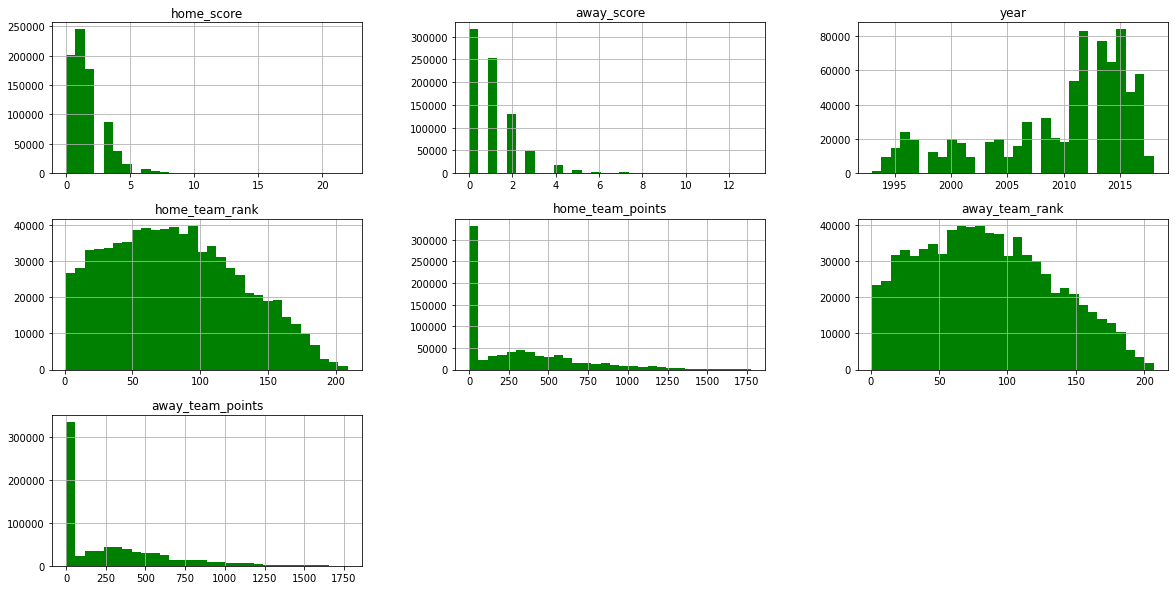

In [42]:
# Ploting the univariate summaries and recording our observations
df.hist(bins = 30, figsize = (20,10), color = 'g')

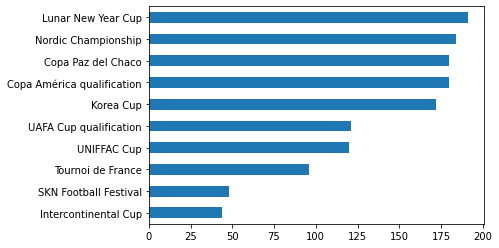

In [43]:
#We want to see a visual of tournament
df.tournament.value_counts().sort_values().head(10).plot(kind = 'barh')

Lunar new year cup had the highest number of tournaments

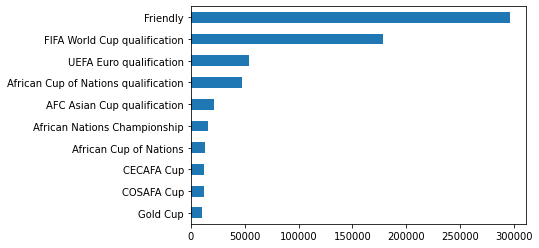

In [44]:
#We want to see a visual of tournament
df.tournament.value_counts().sort_values().tail(10).plot(kind = 'barh')

COSAFA cup and Gold cup we among the lowest tournment

<Figure size 1800x1080 with 0 Axes>

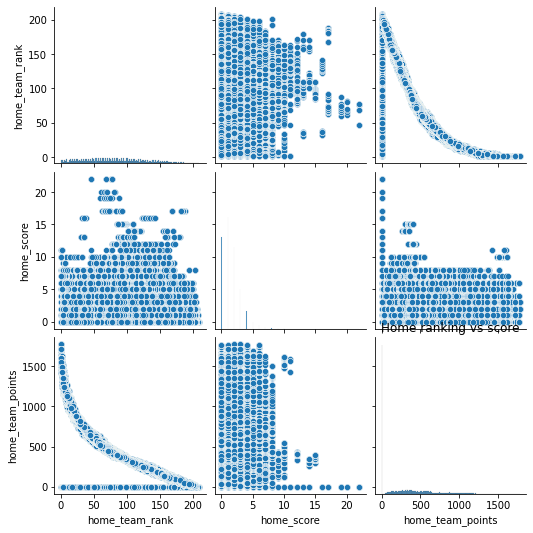

In [45]:
#comparing ranking with score
plt.figure(figsize=(25,15))
sns.pairplot(df[['home_team_rank','home_score',  'home_team_points']])
plt.title('Home ranking vs score')
plt.show()

<Figure size 1800x1440 with 0 Axes>

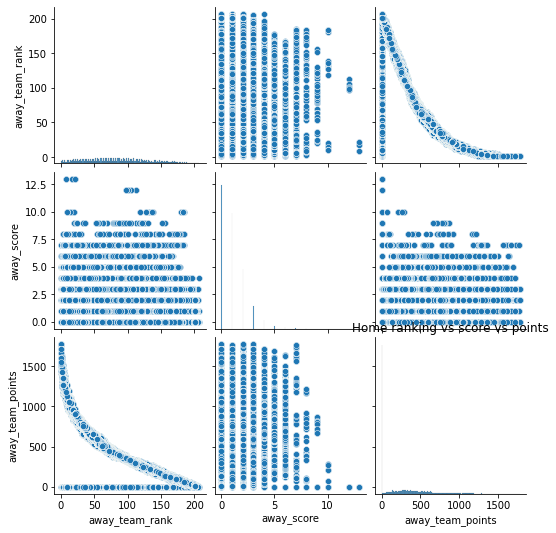

In [46]:
plt.figure(figsize=(25,20))
sns.pairplot(df[['away_team_rank','away_score',  'away_team_points']])
plt.title('Home ranking vs score vs points')
plt.show()

In both plots it shows there is a relation between points and ranking.

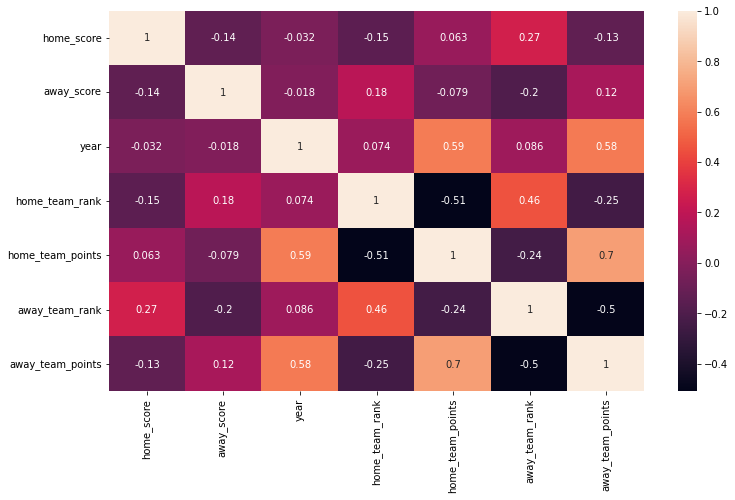

In [47]:
#Checking for correlation
plt.subplots(figsize=(12,7))
sns.heatmap(df.corr(), annot=True)

There is some noticable correlation:


*   between home team and away team points

*   Theyear vs points which is expected since some team had some good years while others not so much. For our regression will not be using year.



On a game final result determines if the team win or if the team lost or they ended in draw. Also a win is equal 3 points, a draw 1 point and a loss 0 points. so will map this into our data set by adding a new calculated column

In [42]:
#will add an outcome column to our data set
def f(row):
    if row['home_score'] == row['away_score']:
        val = 'Draw'
    elif row['home_score'] > row['away_score']:
        val = 'Win'
    else:
        val = 'Lose'
    return val

df['Outcome'] = df.apply(f, axis=1)


df.head(3)

,home_team,away_team,home_score,away_score,tournament,year,home_team_rank,home_team_points,away_team_rank,away_team_points,Outcome
20,Bolivia,Uruguay,3,1,FIFA World Cup qualification,1993,58,0.0,22,0.0,Win
21,Bolivia,Uruguay,3,1,FIFA World Cup qualification,1993,58,0.0,15,0.0,Win
23,Bolivia,Uruguay,3,1,FIFA World Cup qualification,1993,58,0.0,18,0.0,Win


In [43]:
#will notbe using the year column so we drop it now
df.drop(['year'], axis=1, inplace=True)
df.head(2)

,home_team,away_team,home_score,away_score,tournament,home_team_rank,home_team_points,away_team_rank,away_team_points,Outcome
20,Bolivia,Uruguay,3,1,FIFA World Cup qualification,58,0.0,22,0.0,Win
21,Bolivia,Uruguay,3,1,FIFA World Cup qualification,58,0.0,15,0.0,Win


# **Modelling**

Our aim is determining what to train given: Rank of home team, Rank of away team and Tournament type

Then come up with model:

Model 1: Predict how many goals the home team scores.

Model 2: Predict how many goals the away team scores.

We are supposed to use polynomial approach and logistic approach

### **Predict how many goals the home team scores.**

### **1. Polynomial Regression Approach**

In [44]:
df.columns

Index(['home_team', 'away_team', 'home_score', 'away_score', 'tournament',
       'home_team_rank', 'home_team_points', 'away_team_rank',
       'away_team_points', 'Outcome'],
      dtype='object')

In [45]:
#converting our categorical column in to numerical
# Encode labels in column 'touranament'. 
 
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
  
df['tournament']= label_encoder.fit_transform(df['tournament']) 

df['Outcome']= label_encoder.fit_transform(df['Outcome']) 
  
df.head()

,home_team,away_team,home_score,away_score,tournament,home_team_rank,home_team_points,away_team_rank,away_team_points,Outcome
20,Bolivia,Uruguay,3,1,26,58,0.0,22,0.0,2
21,Bolivia,Uruguay,3,1,26,58,0.0,15,0.0,2
23,Bolivia,Uruguay,3,1,26,58,0.0,18,0.0,2
25,Brazil,Uruguay,2,0,26,8,0.0,22,0.0,2
26,Brazil,Uruguay,2,0,26,8,0.0,15,0.0,2


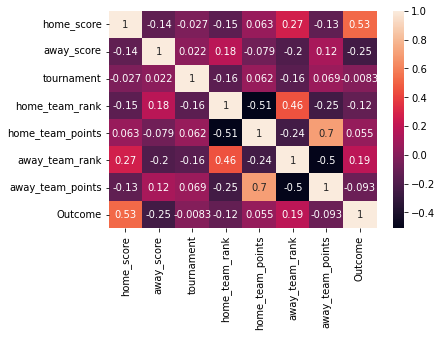

In [46]:
#Multicorrelation check
sns.heatmap(df.corr(), annot=True)

There is correlation between away and home ranking but luckily we making two  model one for each however the correlation is not that strong so we ignore

In [47]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [48]:
# Splitting our dataset 
#
X = df.drop(["home_score"], axis=1)
y = df["home_score"]

In [49]:

# Encoding categorical variables
#
X = pd.get_dummies(X, drop_first=True)

# Splitting the dataset into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10)

# Standardising the X_train and the X_test to the same scale
#
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [50]:
# Fitting the polynomial features to the X_train and X_test
#
poly_features = PolynomialFeatures(degree = 1)
X_train = poly_features.fit_transform(X_train)
X_test = poly_features.fit_transform(X_test)

# Training the model
#
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Making predictions
#
y_pred = regressor.predict(X_test)

# Measuring the accuracy of the model
#
print(np.sqrt(mean_squared_error(y_test, y_pred)))

1.1103681631543751


Our RMSE is 1.1 , the mean for our home score is 1.5. Makking this model a good model

**2. Logistic Regression Approach**

In [51]:
#Preprocessing
#spliting our dataset
X = df.drop(['Outcome'], axis=1)
y = df['Outcome']


# Encoding categorical variables
#
X = pd.get_dummies(X, drop_first=True)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [52]:
# Fitting our model
# 
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [53]:
# Using our model to make a prediction
#
y_pred = LogReg.predict(X_test)

In [54]:
# Evaluating the model
#
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[32342,  5169, 11145],
       [ 7010, 45734,     0],
       [ 5011,     0, 88631]])

In [56]:
# Creating the logistic regression
from sklearn import linear_model, datasets
logistic = linear_model.LogisticRegression()

In [57]:
# Creating regularization penalty space
penalty = ['l1', 'l2']

# Creating regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Creating hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [58]:
# Creating grid search using 5-fold cross validation
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)

In [ ]:
# Fitting grid search
best_model = clf.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
# Viewing best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

In [ ]:
# Predicting target vector
best_model.predict(X)

This model was able to predict home score with 99% accuracy

### **Model 2: Predict how many goals the away team scores.**

**1. Polynomial Regression Approach**

In [ ]:
df.columns

In [ ]:
#converting our categorical column in to numerical
# Encode labels in column 'touranament'. 
 
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
  
df['tournament']= label_encoder.fit_transform(df['tournament']) 
df['Outcome']= label_encoder.fit_transform(df['Outcome'])  
df.head()

In [ ]:
#Multicorrelation check
sns.heatmap(df.corr(), annot=True)

In [ ]:
# Splitting our dataset desnity
#
X = df.drop(["away_score"], axis=1)
y = df["away_score"]

In [ ]:
# Encoding categorical variables
#
X = pd.get_dummies(X, drop_first=True)

# Splitting the dataset into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10)

# Standardising the X_train and the X_test to the same scale
#
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Fitting the polynomial features to the X_train and X_test
#
poly_features = PolynomialFeatures(degree = 1)
X_train = poly_features.fit_transform(X_train)
X_test = poly_features.fit_transform(X_test)

# Training the model
#
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Making predictions
#
y_pred = regressor.predict(X_test)

# Measuring the accuracy of the model
#
print(np.sqrt(mean_squared_error(y_test, y_pred)))

### **2. Logistic Regression approach**

In [ ]:
#Preprocessing
#spliting our dataset
X = df.drop(['Outcome'], axis=1)
y = df['Outcome']

# Encoding categorical variables
#
X = pd.get_dummies(X, drop_first=True)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y)

In [ ]:
# Fitting our model
# 
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

In [ ]:
# Using our model to make a prediction
#
y_pred = LogReg.predict(X_test)

In [ ]:
# Evaluating the model
#
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

In [ ]:
# Creating the logistic regression
from sklearn import linear_model, datasets
logistic = linear_model.LogisticRegression()

In [ ]:
# Creating regularization penalty space
penalty = ['l1', 'l2']

# Creating regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Creating hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [ ]:
# Creating grid search using 5-fold cross validation
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)

In [ ]:
# Fitting grid search
best_model = clf.fit(X, y)

In [ ]:
# Viewing best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

In [ ]:
# Predicting target vector
best_model.predict(X)